データ生成

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.utils import shuffle

np.random.seed(0)  # 乱数シード

M = 2      # 入力データの次元
K = 3      # クラス数
n = 100    # クラスごとのデータ数
N = n * K  # 全データ数

X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

Using TensorFlow backend.


モデル設定

In [2]:
model = Sequential()
model.add(Dense(input_dim=M, units=K))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

モデル学習

In [3]:
minibatch_size = 50
model.fit(X, Y, epochs=20, batch_size=minibatch_size)

Epoch 1/20
300/300 [==============================] - 2s 5ms/step - loss: 2.0826
Epoch 2/20
300/300 [==============================] - 0s 55us/step - loss: 0.1829
Epoch 3/20
300/300 [==============================] - 0s 54us/step - loss: 0.1311
Epoch 4/20
300/300 [==============================] - 0s 53us/step - loss: 0.1057
Epoch 5/20
300/300 [==============================] - 0s 55us/step - loss: 0.0902
Epoch 6/20
300/300 [==============================] - 0s 53us/step - loss: 0.0789
Epoch 7/20
300/300 [==============================] - 0s 53us/step - loss: 0.0701
Epoch 8/20
300/300 [==============================] - 0s 53us/step - loss: 0.0636
Epoch 9/20
300/300 [==============================] - 0s 53us/step - loss: 0.0590
Epoch 10/20
300/300 [==============================] - 0s 51us/step - loss: 0.0542
Epoch 11/20
300/300 [==============================] - 0s 52us/step - loss: 0.0510
Epoch 12/20
300/300 [==============================] - 0s 55us/step - loss: 0.0476
Epoch 13/20
30

学習結果の確認

In [4]:
X_, Y_ = shuffle(X, Y)
classes = model.predict_classes(X_[0:10], batch_size=minibatch_size)
prob = model.predict_proba(X_[0:10], batch_size=minibatch_size)
print('classified:')
print(np.argmax(model.predict(X_[0:10]), axis=1) == classes)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]
()
output probability:
[[9.9865520e-01 1.3448116e-03 2.1935601e-10]
 [2.9307469e-03 9.7283429e-01 2.4235016e-02]
 [9.6656960e-01 3.3430368e-02 4.5890193e-08]
 [1.7156677e-02 9.7406363e-01 8.7796366e-03]
 [3.4497252e-09 9.4414735e-03 9.9055851e-01]
 [1.4953142e-02 9.7935200e-01 5.6948499e-03]
 [2.0219373e-07 4.6562523e-02 9.5343727e-01]
 [6.5991479e-08 9.5339734e-03 9.9046600e-01]
 [7.0335742e-12 1.5032224e-04 9.9984968e-01]
 [9.9576533e-01 4.2346483e-03 2.3160653e-09]]


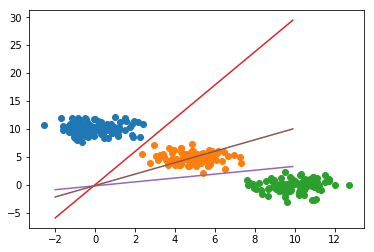

In [24]:
import matplotlib.pyplot as plt
W_es = model.get_weights()[0]
b_es = model.get_weights()[1]
plot_x = np.arange(-2, 10, 0.1)
plt.plot(X1[:,0],X1[:,1],'o')
plt.plot(X2[:,0],X2[:,1],'o')
plt.plot(X3[:,0],X3[:,1],'o')
plt.plot(plot_x,(-(W_es[0,0] - W_es[0,1]) * plot_x - (b_es[0]-b_es[1])) /(W_es[1,0] - W_es[1,1]))
plt.plot(plot_x,(-(W_es[0,1] - W_es[0,2]) * plot_x - (b_es[1]-b_es[2])) /(W_es[1,1] - W_es[1,2]))
plt.plot(plot_x,(-(W_es[0,0] - W_es[0,2]) * plot_x - (b_es[0]-b_es[2])) /(W_es[1,0] - W_es[1,2]))